In [653]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [654]:
titanic = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/titanic/train.csv')

In [655]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Словарь данных

Переменная: 
- survival 
 Определение: Выживание 
 Ключ: 0 = Нет, 1 = Да 

- pclass 
 Определение: Класс билета 
 Ключ: 1 = 1-й класс, 2 = 2-й класс, 3 = 3-й класс 

- sex 
 Определение: Пол 

- age 
 Определение: Возраст в годах 

- sibsp 
 Определение: Количество братьев/сестер или супругов на борту Титаника 

- parch 
 Определение: Количество родителей/детей на борту Титаника 

- ticket 
 Определение: Номер билета 

- fare 
 Определение: Плата пассажира 

- cabin 
 Определение: Номер каюты 

- embarked 
 Определение: Порт посадки 
 Ключ: C = Шербур, Q = Квинстаун, S = Саутгемптон 




In [656]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    sns.barplot(x=percent_nan.index,y=percent_nan)
    plt.xticks(rotation=90);
    return percent_nan

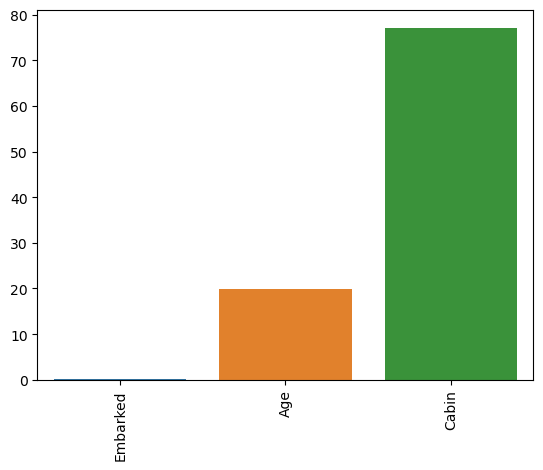

In [657]:
percent_nan = percent_missing(titanic)


In [658]:
titanic = titanic.dropna(axis=0, subset=['Embarked'])

<Figure size 640x480 with 0 Axes>

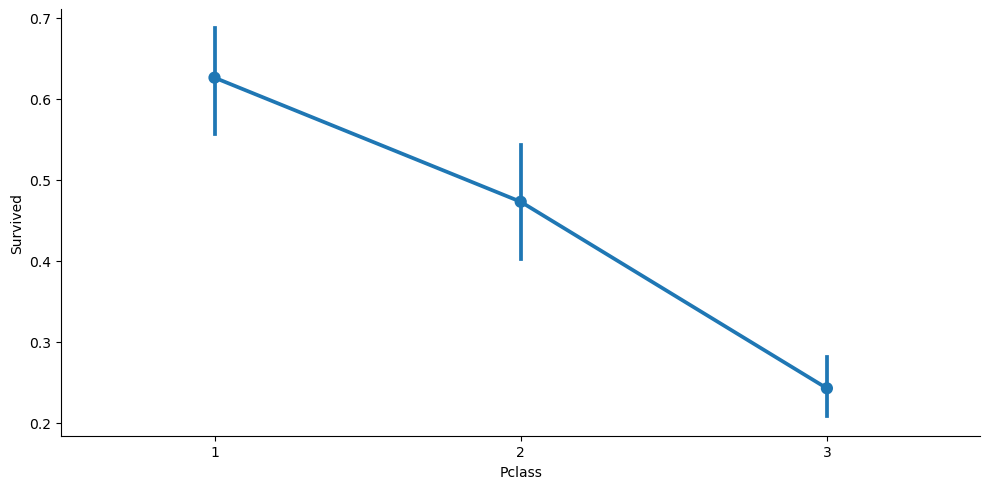

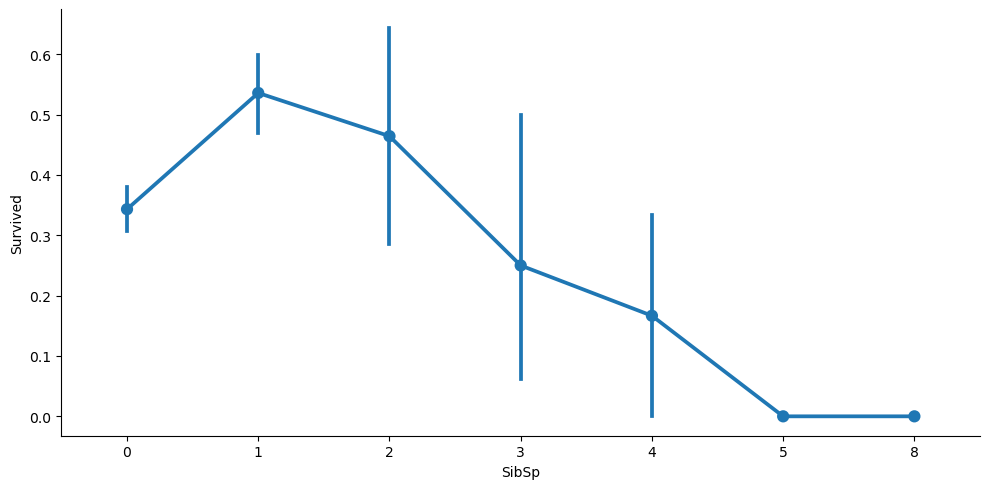

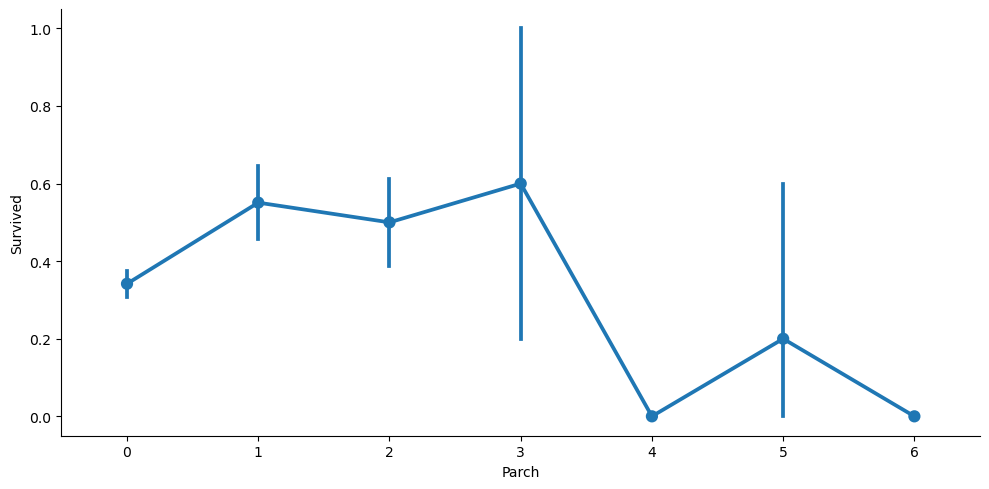

In [659]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [660]:
titanic['family'] = titanic['SibSp'] + titanic['Parch']

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_94869/1521497677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['family'] = titanic['SibSp'] + titanic['Parch']


In [661]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_94869/1013071036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


In [662]:
titanic = titanic.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket'], axis=1)

In [663]:
titanic['Age'] = titanic['Age'].apply(lambda x: round(x))

In [664]:
titanic['Cabin_indecator'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic = titanic.drop('Cabin', axis=1)

In [665]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,family,Cabin_indecator
0,0,3,male,22,7.2500,S,1,0
1,1,1,female,38,71.2833,C,1,1
2,1,3,female,26,7.9250,S,0,0
3,1,1,female,35,53.1000,S,1,1
4,0,3,male,35,8.0500,S,0,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S,0,0
887,1,1,female,19,30.0000,S,0,1
888,0,3,female,30,23.4500,S,3,0
889,1,1,male,26,30.0000,C,0,1


<Figure size 640x480 with 0 Axes>

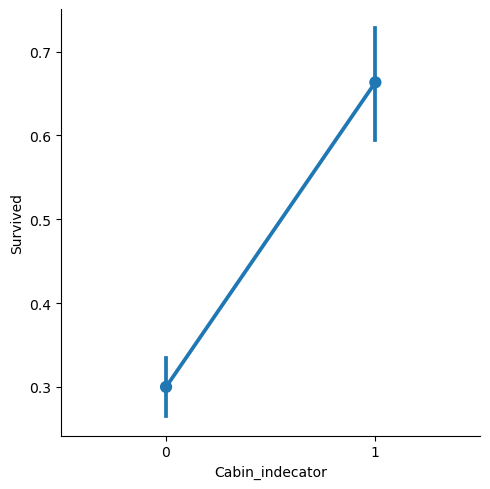

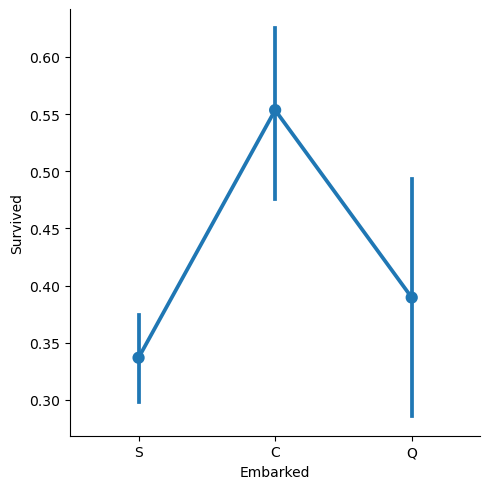

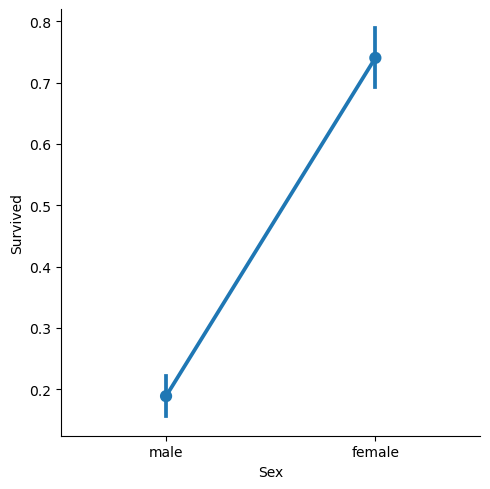

In [666]:
for i, col in enumerate(['Cabin_indecator', 'Embarked', 'Sex']):
    plt.figure(i)
    sns.catplot(data=titanic, x=col, y='Survived', kind='point')

In [667]:
titanic = titanic.drop('Embarked', axis=1)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

<Axes: >

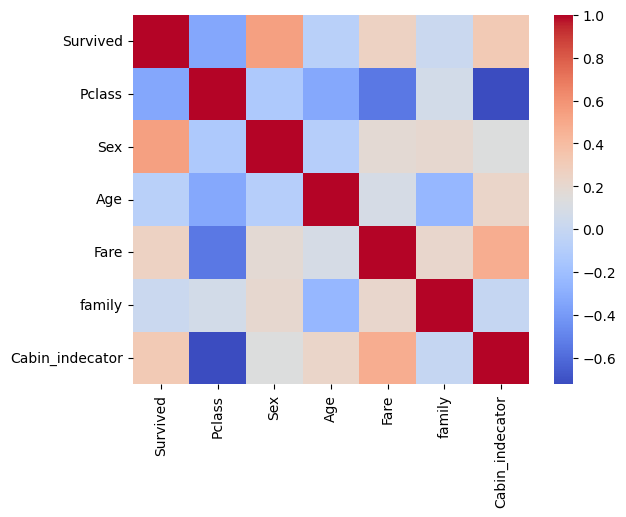

In [668]:
sns.heatmap(titanic.corr(), cmap='coolwarm')

In [669]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [670]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [671]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [672]:
from sklearn.linear_model import LogisticRegressionCV

log_model = LogisticRegressionCV(scoring='roc_auc')
log_model.fit(X_train, y_train)


LogisticRegressionCV(scoring='roc_auc')

In [673]:
y_pred = log_model.predict(X_test)


In [674]:
from sklearn.metrics import confusion_matrix, classification_report

In [675]:
confusion_matrix(y_test, y_pred)

array([[51,  6],
       [ 7, 25]])

In [676]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.81      0.78      0.79        32

    accuracy                           0.85        89
   macro avg       0.84      0.84      0.84        89
weighted avg       0.85      0.85      0.85        89



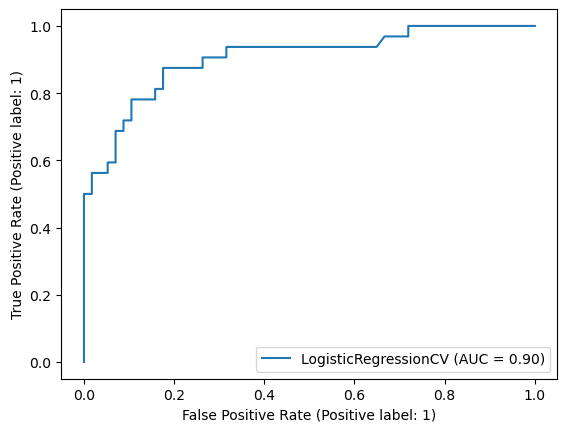

In [677]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model, X_test, y_test)